# SDP Lab 03: IIR Filter Design with Prony method

## Usage

This file is is designed to be run live in a browser. This file is a Jupyter Notebook using the Octave kernel.

Usage:
  - `Shift+Enter` on a code cell = Execute and go to next cell
  - `Ctrl+Enter` on a code cell = Execute and stay at this cell

## Practical considerations

### The autocorrelation function

For a general signal $x[n]$, the autocorrelation function is defined as:
$$r_{xx}[k] = \sum_{n=-\infty}^{\infty} x[n] x[n-k]$$

In Matlab, for a vector `x` of length `L` (values go from `x[1]` to `x[L]`), the autocorrelation is computed with the function `xcorr()`. The following example computes the autocorrelation values:

In [1]:
pkg load signal  % Run this once only, only for Octave, to load required functions

In [9]:
x = [1,2,3,4];
rxx = xcorr(x)   % Compute the autocorrelation of x

rxx =

    4.0000   11.0000   20.0000   30.0000   20.0000   11.0000    4.0000



There are 2*L-1 values in total (L is the length of `x`), starting from $r_{xx}[-(L-1)]$ up to $r_{xx}[L-1]$. So, the value $r_{xx}[0]$ is actually in the middle of the result vector, `rxx(L)`:

In [12]:
L = length(x);
rxx(L+0)     % This is r_xx[0] in theory
rxx(L+1)     % This is r_xx[1] in theory
rxx(L-3)     % This is r_xx[-3] in theory

ans =  30
ans =  20
ans =  4.0000


### **Exercise**: plot autocorrelation

**Exercise**: Compute and plot the autocorrelation function for the constant vector $\{3, 3, 3, 3, 3, 3, 3\}$ (use `xcorr()` and `stem()` functions).
The indicate what is the value of $r_{xx}[0]$ and $r_{xx}[2]$

rxx =

    9   18   27   36   45   54   63   54   45   36   27   18    9

L =  7
ans =  63
ans =  45


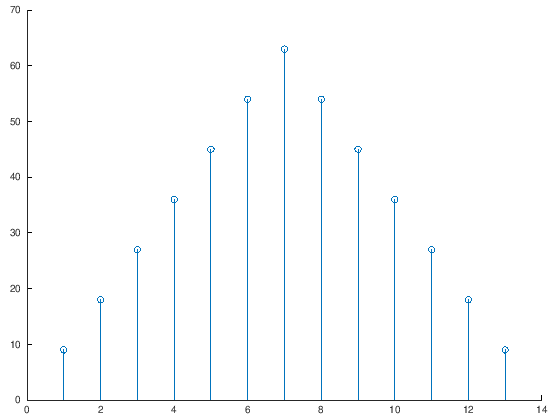

In [15]:
% TODO: write code here
x = [3,3,3,3,3,3,3];
rxx = xcorr(x)
stem(rxx)

L = length(x)
rxx(L)
rxx(L+2)

The plot should look like a triangle.

## Restricted autocorrelation for Prony method

For the Prony method we need the values of a **restricted autocorrelation**, defined as:
$$r_{xx}[k,l] = r_{xx}[k-l] = \sum_{n=M+1}^\infty h[n-k] h[n-l] = \sum_{n=M+1-k}^\infty h[n] h[n+(k-l)]$$

The difference is that the **sum doesn't start from $n=0$**, but from a higher value, so the first elements in the sum are skipped.

The restricted autocorrelation can be computed just like the normal autocorrelation, but with the first $M + 1 - max(k,l)$ elements of the vector set to 0.

Consider the example below to compute $r_{xx}[k=1, l=2]$, for $M=2$:

In [18]:
M = 2;
x = [1,2,3,4];
k=1;
l=2;

x(1 : M+1-max(k,l)) = 0; % Set first elements to 0
x                        % Display the restricted x
rxx = xcorr(x)           % Compute the restricted autocorrelation vector

x =

   0   2   3   4

rxx =

 Columns 1 through 6:

  -1.7764e-15   8.0000e+00   1.8000e+01   2.9000e+01   1.8000e+01   8.0000e+00

 Column 7:

  -1.7764e-15



### **Exercise**: make a function for restricted autocorrelation

Create a function `r = xcorr_prony(x, k, l, M)` to compute one value the restricted autocorrelation required for the Prony method.
Make sure to return a single value, $r_{xx}[k-l]$ (remember $r_{xx}[0] = $ `rxx(L)` in Matlab).

Test your function with the following values, for `x = [1,2,3,2,1,2,3]` and `M=2`:
$$\begin{align}
r_{xx}[1,1] &= 27\\
r_{xx}[1,2] &= 22\\
r_{xx}[2,1] &= 22\\
r_{xx}[2,2] &= 31\\
r_{xx}[1] = r_{xx}[1,0] &= 16\\
r_{xx}[2] = r_{xx}[2,0] &= 14\\
\end{align}$$


For this file, you can define it below and run the cell. For running offline in Matlab/Octave, save it as a file `xcorr_prony.m`

In [4]:
function r = xcorr_prony(x, k, l, M)
% Computes restricted autocorrelation for the Prony method
% Inputs:
%  x = the input vector
%  k,l = the element to compute
%  M = the degree of the numerator polynomial B(z)
% Returns:
%  r = rxx[k-l] (k-l is the index in theory)

x(1 : M+1-max(k,l)) = 0; % Set first elements to 0
% x                      % Display the restricted x
rxx = xcorr(x);           % Compute the restricted autocorrelation vector

L = length(x);
r = rxx(L + k-l);        % value at position L+k-l is the value which in theory we call rxx[k-l]
end

% Call it here to find the values, like this:
x = [1,2,3,2,1,2,3];
M=2;
%            x   k   l   M
xcorr_prony( x , 1 , 1 , M)
xcorr_prony( x , 1 , 2 , M)
xcorr_prony( x , 2 , 1 , M)
xcorr_prony( x , 2 , 2 , M)
xcorr_prony( x , 1 , 0 , M)
xcorr_prony( x , 2 , 0 , M)

ans =  27
ans =  22
ans =  22
ans =  31
ans =  16
ans =  14


## Equation systems for the Prony method

The Prony method find first the coefficients $\{a_k\}$ based on a system using the restricted autocorrelation values:

$$
\begin{bmatrix}
r_{dd}[1,1] & r_{dd}[1,2] & \dots & r_{dd}[1,N] \\
r_{dd}[2,1] & r_{dd}[2,2] & \dots & r_{dd}[2,N] \\
\vdots & \dots & \dots & \vdots \\ 
r_{dd}[N,1] & r_{dd}[N,2] & \dots & r_{dd}[N,N] \\
\end{bmatrix}
\begin{bmatrix} 
a_1 \\ 
a_2 \\ 
\vdots \\ 
a_N \\ 
\end{bmatrix}
= 
\begin{bmatrix} 
- r_{dd}[1,0] \\ 
- r_{dd}[2,0] \\ 
\vdots \\ 
- r_{dd}[N,0] \\ 
\end{bmatrix}$$


### **Exercise**: solve the $\{a_k\}$ system for $M=2$

Solve the system for $h_d[n] = \{1,2,3,2,1,2,3\}$, with $M=2$ and $N=2$. Use `linsolve()`.

In [7]:
% 27 22 
% 22 31
A = [ 27 , 22 ; 22 , 31];   % 2x2 matrix
B = [-16 ; -14];   % 2x1 column vector

a = linsolve(A,B)   % solve

a =

  -0.532578
  -0.073654



The numerator coefficients are found by the same equations as in the Pade method, using the values $\{a_k\}$ found above.
The equations can be written as:
$$b_n = h_d[n] + \sum_{k=1}^N a_k h_d[n-k]$$

A quick way to implement this in Matlab is:

In [15]:
% Sample input data
hd = [1,2,3,2,1,2,3];
a  = [0.4, 0.5];   % from a_1 onwards
M = 2;             % degree of numerator
N = 2;             % degree of denominator

% Compute bn
n = ;  % specify which element to compute
bn = hd(n+1) + sum(a(1:n) .* hd(n:-1:1))

bn =  4.3000


### **Exercise**: Compute all $b_n$

Copy the exercise above and extend it, in order to find all coefficients $b_n$ and place them in a vector `b`. Use a `for` loop to compute the coefficients.

In [17]:
% Sample input data
hd = [1,2,3,2,1,2,3];
a  = [0.4, 0.5];   % from a_1 onwards
M = 2;             % degree of numerator
N = 2;             % degree of denominator

% TODO: write here
for n=0:M
    b(n+1) = hd(n+1) + sum(a(1:n) .* hd(n:-1:1));
end
b

b =

   1.0000   2.4000   4.3000



## Final Exercises


1. Implement in Matlab a function for creating and then solving the equation system
resulting from the **Prony method**:

    ```[b,a] = pronymet(order, hd)```

   The function shall have the following arguments:
      - `order`: the order of the designed filter
      
      - `hd`: a vector holding the first samples of the desired impulse response

   The function shall return the coefficients of the system function for the resulting filter:
      - `b`: the numerator coefficients
      
      - `a`: the denominator coefficients

2. Use the function above to design a second order filter with the Prony method, for
approximating the desired impulse response given below:
$$h_d[n] = \left(\frac{1}{3}\right)^n \cdot \cos(\frac{\pi}{4}n)\cdot u[n]$$

    You can reuse the code from the last laboratory to generate the signal $h_d$.

2. Use the function above to design with the Prony method a filter of order 2
which approximates the following higher-order filter (3):
$$H(z) = \frac{0.0736 + 0.0762 z^{-1} + 0.0762 z^{-1} + 0.0736 z^{-3}}
{1 - 1.3969 z^{-1} + 0.8778 z^{-1} - 0.1812 z^{-3}}$$

    - a. Use the function `impz()` to generate the impulse response
      of the given filter, for at least 100 time moments;
      
      **Note**: `impz()` is used to generate the impulse response of a system, as follows:
      ```h = impz(b,a,N); ```
      where `b` and `a` are the coefficients of the system, and `N` is the desired length
    
    - b. Use your function `pronymet()` to actually design the filter;
    
    - c. Plot the impulse response of the given filter, and the impulse response of the designed filter, for the first 50 samples.
    Are any samples identical?

3. Load a sample audio file in Matlab and filter it with the filter found above, just like we did in Lab 01.
Play the filtered signal. How does it sound like? Compare it with the original signal.
